In [1]:
import numpy as np
import pandas
import karta

ridings = karta.read_shapefile("/home/natw/Dropbox/DataForGood/election2017/raw-data/edsre2015-simplified/edsre2015-simplified.shp")

doctors = pandas.read_csv("/home/natw/Dropbox/DataForGood/election2017/scraped-doctors/CPSBC-data-v0.2.0-geocoded.csv")

data2 = pandas.read_csv("CPSBC-data-v0.2.1.csv")
geo = pandas.read_csv("bc-geodata.csv")

doctors2 = pandas.concat([data2, geo[["Longitude", "Latitude"]]], axis=1)

print(doctors.shape, doctors2.shape, geo.shape)

(6119, 16) (6119, 16) (6119, 4)


In [2]:
#doctor_mp = karta.Multipoint(np.c_[doctors.lon, doctors.lat], crs=karta.crs.LonLatWGS84)
geo_mp = karta.Multipoint(np.c_[geo.Longitude, geo.Latitude],
                          data={"index": np.arange(len(geo))},
                          crs=karta.crs.LonLatWGS84)

ed_name_vec = np.empty(len(geo), dtype=object)
ed_id_vec = np.empty(len(geo), dtype=int)
for riding in ridings:
    mp = geo_mp.within_polygon(riding)
    ed_name_vec[mp.d["index"]] = riding.properties["ED_NAME"]
    ed_id_vec[mp.d["index"]] = riding.properties["ED_ID"]

In [3]:
doctors2["Riding_Name"] = ed_name_vec
doctors2["Riding_ID"] = ed_id_vec

In [4]:
doctors2.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Accepting_New_Patients,Male,Female,Female,Female,Male
Address,"2791 First Ave//Terrace, BC//V8G 0G2",Park Avenue Medical Clinic//4634 Park Ave//Ter...,Park Avenue Medical Clinic//4634 Park Ave//Ter...,Park Avenue Medical Ctr.//400-4634 Park Ave//T...,"Emergency Departement, Mills Memorial Hospital..."
Anatomical_Pathology,False,False,False,False,False
CCFP,False,True,False,False,False
CCFP_EM,False,False,False,False,False
Emergency_Medicine,False,False,False,False,False
Gender,General Family Practice,General Family PracticeCCFP,General Family Practice,General Family Practice,General Family Practice
General_Family_Practice,True,True,True,True,True
General_Surgery,False,False,False,False,False


In [5]:
doctors2.to_csv("CPSBC-data-v0.2.1-riding.csv")

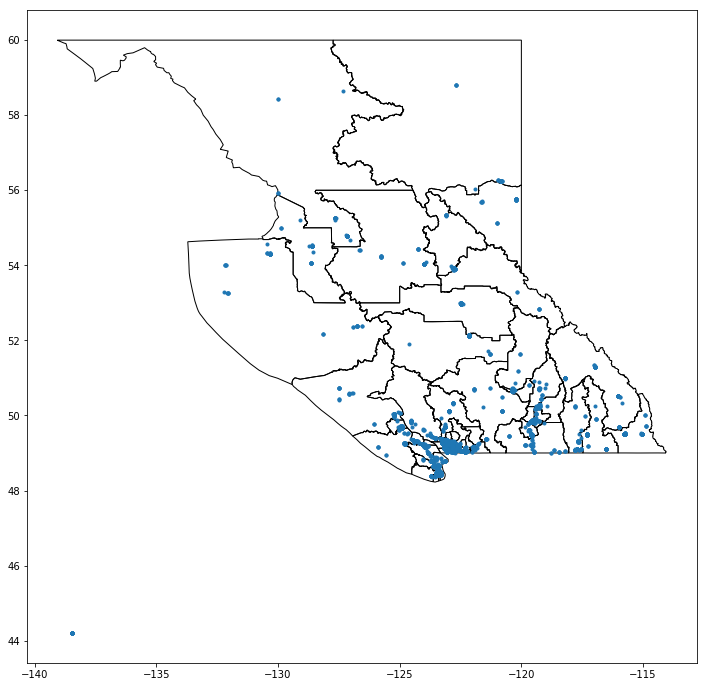

In [6]:
import mapping
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 12))
map_crs = karta.crs.LonLatWGS84
_ = mapping.plot(ridings, crs=map_crs)
mapping.plot(geo_mp, crs=map_crs)